# Лабораторна робота №2: Очистка даних та базова візуалізація

Київський національний університет імені Тараса Шевченка провів відкритий екзамен з Нейронних мереж серед студентів та викладачів університету. Оскільки результати екзамену фіксувалися різними викладачами та відповідальними особами, дані записані у різних форматах, що ускладнює їх аналіз.

Ректорат університету просить привести дані до єдиного формату та виконати їх аналіз для визначення рівня підготовки студентів різних факультетів. Це допоможе ухвалити рішення щодо необхідності впровадження покращених або базових курсів з Нейронних мереж для окремих факультетів.


## Завдання 1. Очистка датасету

**Обробити вхідний датасет, забезпечивши, щоб усі записи з кожного стовпчика відповідали єдиному формату:**

1. **Ім'я:**
    * поле "name" містить лише ім'я
    * поле "surname" містить лише прізвище
    * додайте стовпчик "patronymic" який містить по-батькові
    * зверніть увагу, що у вхідному датасеті поле "name" може містити ім'я записане у різних форматах:
        * Ім'я
        * Ім'я Прізвище
        * Ім'я По-батькові Прізвище
    * Розбийте ім'я, прізвище та по-батькові за відповідними колонками
2. **Стовпчик назв факультетів містить лише 4 різних значення які відповідають наступним факультетам:**
    * Факультет комп'ютерних наук та кібернетики
    * Факультет радіофізики електроніки та комп'ютерних систем
    * Механіко-математичний факультет
    * Факультет інформаційних технологій
3. **Номери телефонів повинні відповідати формату +38(YYY) XXX-XX-XX, де YYY - код оператора**
4. **Стовчик "education level", який містить назву ОКР повинен мати одне з чотирьох значень:**
    * бакалавр
    * магістр
    * аспірант
    * (пусте поле) для викладачів
5. **Розбити стовпчик "score" на два стовпчика: "100_score" та "5_score", прибравши оригінальний стовпчик "score"**
    * Оцінка 3 конвертується у 60, 4 конвертується у 75, а 5 конвертується у 90
    * Оцінки [60; 74] конвертуються у 3, [75; 89] конвертуються у 4, а [90; 100] у 5
6. **Стовпчик повинен мати лише одне з двох значень яке визначатиме чи запис відноситься до студента чи до викладача**

_Якщо у процесі очистки датасету з'явились дубльовані рядки, необхідно їх прибрати._

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('exam_dataset.csv')
df.head()

,id,name,surname,faculty,phone number,course,education level,score,role
0,2,Олена Дмитрівна,Гнатюк,Факультет комп'ютрених наук та кібернетики,0772570497,1.0,аспірант,95,Студентка
1,6,Михайло Васильович,Гончаренко,Факультет радіофізики електроніки та комп'ютер...,093 333 1022,1.0,аспірант,4,Студент
2,7,Наталія,Сидоренко,ФРЕКС,093 302 8386,1.0,магістр,85,Студентка
3,12,Дмитро Чумак,NaN,Факультет радіофізики електроніки та комп'ютер...,+38(096) 676-02-62,1.0,аспірантура,75,Студент
4,13,Володимир Григорійович,Ткаченко,ФКНК,0984209177,1.0,магістр,78,Студент


In [2]:
def split_name(name):
    parts = name.split()
    surname = parts[-1] if parts else None
    name = parts[0] if len(parts) >= 1 else None
    patronymic = parts[1] if len(parts) == 3 else None
    return pd.Series({'name': name, 'surname': surname, 'patronymic': patronymic})

df[['name', 'surname', 'patronymic']] = df['name'].apply(split_name)

df.head()

,id,name,surname,faculty,phone number,course,education level,score,role,patronymic
0,2,Олена,Дмитрівна,Факультет комп'ютрених наук та кібернетики,0772570497,1.0,аспірант,95,Студентка,None
1,6,Михайло,Васильович,Факультет радіофізики електроніки та комп'ютер...,093 333 1022,1.0,аспірант,4,Студент,None
2,7,Наталія,Наталія,ФРЕКС,093 302 8386,1.0,магістр,85,Студентка,None
3,12,Дмитро,Чумак,Факультет радіофізики електроніки та комп'ютер...,+38(096) 676-02-62,1.0,аспірантура,75,Студент,None
4,13,Володимир,Григорійович,ФКНК,0984209177,1.0,магістр,78,Студент,None


In [3]:
def normalize_faculty(faculty_raw):
    f = str(faculty_raw).lower().strip()
    
    if "кібернетики" in f or "фкнк" in f:
        return "Факультет комп'ютрених наук та кібернетики"
    elif "радіофізики" in f or "фрекс" in f:
        return "Факультет радіофізики електроніки та комп'ютерних систем"
    elif "математичний" in f or "мех-мат" in f:
        return "Механіко-математичний факультет"
    elif "інформаційних" in f or "фіт" in f:
        return "Факультет інформаційних технологій"
    else:
        raise RuntimeEror("Unknown: ".format(faculty_raw))

df["faculty"] = df["faculty"].apply(normalize_faculty)
print(df['faculty'].unique())
df.head()


["Факультет комп'ютрених наук та кібернетики"
 "Факультет радіофізики електроніки та комп'ютерних систем"
 'Факультет інформаційних технологій' 'Механіко-математичний факультет']


,id,name,surname,faculty,phone number,course,education level,score,role,patronymic
0,2,Олена,Дмитрівна,Факультет комп'ютрених наук та кібернетики,0772570497,1.0,аспірант,95,Студентка,None
1,6,Михайло,Васильович,Факультет радіофізики електроніки та комп'ютер...,093 333 1022,1.0,аспірант,4,Студент,None
2,7,Наталія,Наталія,Факультет радіофізики електроніки та комп'ютер...,093 302 8386,1.0,магістр,85,Студентка,None
3,12,Дмитро,Чумак,Факультет радіофізики електроніки та комп'ютер...,+38(096) 676-02-62,1.0,аспірантура,75,Студент,None
4,13,Володимир,Григорійович,Факультет комп'ютрених наук та кібернетики,0984209177,1.0,магістр,78,Студент,None


In [4]:
def format_phone(phone):
    digits = re.sub(r"[^\d]", "", str(phone)) 
    if len(digits) == 9:
        digits = "0" + digits

    if len(digits) == 10:
        digits = "38" + digits
    
    if len(digits) == 12 and digits.startswith("38"):
        return f"+{digits[0:2]}({digits[2:5]}) {digits[5:8]}-{digits[8:10]}-{digits[10:12]}"
    else:
        return phone

df['phone number'] = df['phone number'].apply(format_phone)
print("\nПісля форматування номерів телефонів:")
df.head()


Після форматування номерів телефонів:


,id,name,surname,faculty,phone number,course,education level,score,role,patronymic
0,2,Олена,Дмитрівна,Факультет комп'ютрених наук та кібернетики,+38(077) 257-04-97,1.0,аспірант,95,Студентка,None
1,6,Михайло,Васильович,Факультет радіофізики електроніки та комп'ютер...,+38(093) 333-10-22,1.0,аспірант,4,Студент,None
2,7,Наталія,Наталія,Факультет радіофізики електроніки та комп'ютер...,+38(093) 302-83-86,1.0,магістр,85,Студентка,None
3,12,Дмитро,Чумак,Факультет радіофізики електроніки та комп'ютер...,+38(096) 676-02-62,1.0,аспірантура,75,Студент,None
4,13,Володимир,Григорійович,Факультет комп'ютрених наук та кібернетики,+38(098) 420-91-77,1.0,магістр,78,Студент,None


In [5]:
def normalize_education_level(level):
    l = str(level).lower().strip()
    if "бак" in l:
        return "бакалавр"
    elif "маг" in l:
        return "магістр"
    elif "асп" in l:
        return "аспірант"
    else:
        # все інше - викладач
        return ""
    
df["education level"] = df["education level"].apply(normalize_education_level)
print(df.shape)
df.head()


(131, 10)


,id,name,surname,faculty,phone number,course,education level,score,role,patronymic
0,2,Олена,Дмитрівна,Факультет комп'ютрених наук та кібернетики,+38(077) 257-04-97,1.0,аспірант,95,Студентка,None
1,6,Михайло,Васильович,Факультет радіофізики електроніки та комп'ютер...,+38(093) 333-10-22,1.0,аспірант,4,Студент,None
2,7,Наталія,Наталія,Факультет радіофізики електроніки та комп'ютер...,+38(093) 302-83-86,1.0,магістр,85,Студентка,None
3,12,Дмитро,Чумак,Факультет радіофізики електроніки та комп'ютер...,+38(096) 676-02-62,1.0,аспірант,75,Студент,None
4,13,Володимир,Григорійович,Факультет комп'ютрених наук та кібернетики,+38(098) 420-91-77,1.0,магістр,78,Студент,None


In [6]:
print(sorted(df['score'].unique()))

[3, 4, 5, 60, 61, 62, 63, 64, 66, 67, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 100]


In [7]:
def format_score(score):
    if score <= 5:
        if score == 3:
            return 60, 3 # or take an average of 74 and 60?
        if score == 4:
            return 75, 4
        return 90, 5
    
    if 60 <= score <= 74:
        return score, 3
    if 75 <= score <= 89:
        return score, 4
    if 90 <= score <= 100:
        return score, 5
    raise ValueError(score)

df[["100_score", "5_score"]] = df["score"].apply(lambda s: pd.Series(format_score(s)))
df.drop(columns=["score"], inplace=True, errors="ignore")
print(df.shape)
df.head()


(131, 11)


,id,name,surname,faculty,phone number,course,education level,role,patronymic,100_score,5_score
0,2,Олена,Дмитрівна,Факультет комп'ютрених наук та кібернетики,+38(077) 257-04-97,1.0,аспірант,Студентка,None,95,5
1,6,Михайло,Васильович,Факультет радіофізики електроніки та комп'ютер...,+38(093) 333-10-22,1.0,аспірант,Студент,None,75,4
2,7,Наталія,Наталія,Факультет радіофізики електроніки та комп'ютер...,+38(093) 302-83-86,1.0,магістр,Студентка,None,85,4
3,12,Дмитро,Чумак,Факультет радіофізики електроніки та комп'ютер...,+38(096) 676-02-62,1.0,аспірант,Студент,None,75,4
4,13,Володимир,Григорійович,Факультет комп'ютрених наук та кібернетики,+38(098) 420-91-77,1.0,магістр,Студент,None,78,4


In [8]:
print(df["role"].unique())

['Студентка' 'Студент' 'Викладачка' 'Викладач']


In [9]:
def normalize_role(role):
    if "тудент" in role:
        return "студент"
    else:
        return "викладач"
    
df["role"] = df["role"].apply(normalize_role)
df.head()

,id,name,surname,faculty,phone number,course,education level,role,patronymic,100_score,5_score
0,2,Олена,Дмитрівна,Факультет комп'ютрених наук та кібернетики,+38(077) 257-04-97,1.0,аспірант,студент,None,95,5
1,6,Михайло,Васильович,Факультет радіофізики електроніки та комп'ютер...,+38(093) 333-10-22,1.0,аспірант,студент,None,75,4
2,7,Наталія,Наталія,Факультет радіофізики електроніки та комп'ютер...,+38(093) 302-83-86,1.0,магістр,студент,None,85,4
3,12,Дмитро,Чумак,Факультет радіофізики електроніки та комп'ютер...,+38(096) 676-02-62,1.0,аспірант,студент,None,75,4
4,13,Володимир,Григорійович,Факультет комп'ютрених наук та кібернетики,+38(098) 420-91-77,1.0,магістр,студент,None,78,4


In [10]:
df.drop_duplicates(inplace=True)
print(df.shape)

(131, 11)


## Завдання 2. Візуалізація основних метрик

### Візуалізація 2.1

_**Діаграма "Пиріг" яка відображає кількість студентів з кожного ОКР (бакалавр, магістр, аспірант).**_

(124, 11)


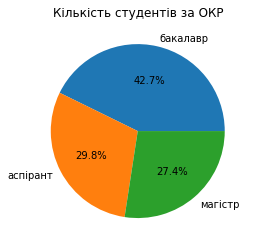

In [11]:
df_students = df[df["role"] == "студент"]
print(df_students.shape)

okr_counts = df_students["education level"].value_counts()

plt.figure()
okr_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Кількість студентів за ОКР")
plt.ylabel("") 
plt.show()

### Візуалізація 2.2

_**Гістограма розподілу оцінок за 100-бальною шкалою (у проміжку від 60 до 100).**_

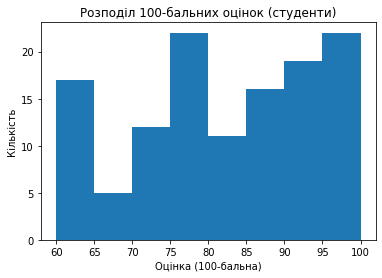

In [12]:
scores_100 = df_students["100_score"].dropna()
scores_100 = scores_100[(scores_100 >= 60) & (scores_100 <= 100)]

plt.figure()
plt.hist(scores_100, bins=range(60, 101, 5))  # діапазон 60..100, крок 5
plt.title("Розподіл 100-бальних оцінок (студенти)")
plt.xlabel("Оцінка (100-бальна)")
plt.ylabel("Кількість")
plt.show()


### Візуалізація 2.3

_**Діаграма "Пиріг" розподілу оцінок за 5-ти бальною шкалою.**_

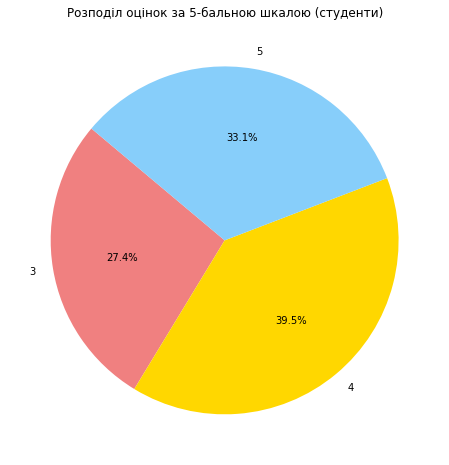

In [13]:
student_scores_5 = df_students['5_score'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
plt.pie(student_scores_5, labels=student_scores_5.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'gold', 'lightskyblue'])
plt.title('Розподіл оцінок за 5-бальною шкалою (студенти)')
plt.show()

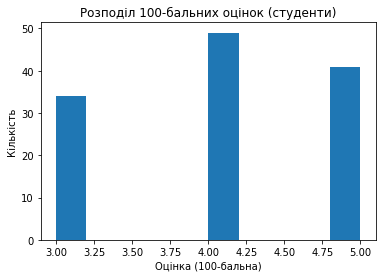

In [23]:
scores_100 =  df_students['5_score']


plt.figure()
plt.hist(scores_100)  # діапазон 60..100, крок 5
plt.title("Розподіл 100-бальних оцінок (студенти)")
plt.xlabel("Оцінка (100-бальна)")
plt.ylabel("Кількість")
plt.show()


### Візуалізація 2.4

_**Гістограма середніх значень оцінок за кожним з чотирьох факультетів (тільки для студентів).**_

(80.0, 84.0)

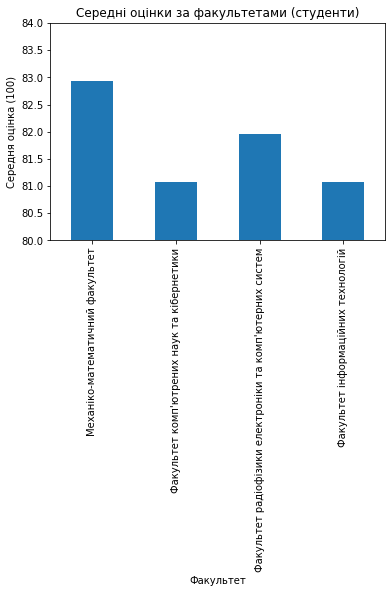

In [14]:
faculty_means = df_students.groupby("faculty")["100_score"].mean().dropna()

plt.figure()
faculty_means.plot(kind='bar')
plt.title('Середні оцінки за факультетами (студенти)')
plt.xlabel('Факультет')
plt.ylabel('Середня оцінка (100)')
plt.ylim(80, 84)

### Візуалізація 2.5

_**Діаграма "Ящик з вусами" для оцінок за кожним ОКР та для Викладачів.**_

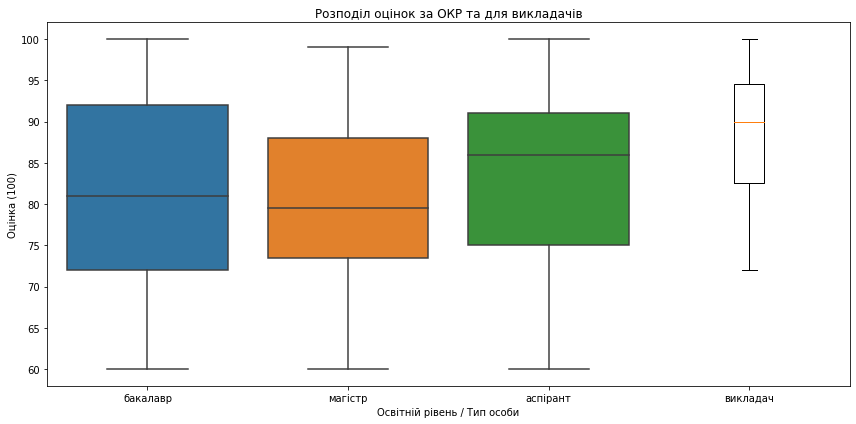

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='education level', y='100_score', data=df_students.dropna(subset=['100_score']), order=['бакалавр', 'магістр', 'аспірант'])
lecturer_scores = df[df['role'] == 'викладач']['100_score'].dropna()
plt.boxplot(lecturer_scores, positions=[3], labels=['викладач'])
plt.title('Розподіл оцінок за ОКР та для викладачів')
plt.xlabel('Освітній рівень / Тип особи')
plt.ylabel('Оцінка (100)')
plt.xticks([0, 1, 2, 3], ['бакалавр', 'магістр', 'аспірант', 'викладач'])
plt.tight_layout()
plt.show()

### Візуалізація 2.6

_**Графік вісь абсцис котрого є наведені значення у порядку:**_

* _**1 курс бакалавр**_
* _**2 курс бакалавр**_
* _**3 курс бакалавр**_
* _**4 курс бакалавр**_
* _**1 курс магістр**_
* _**2 курс магістр**_
* _**1 курс аспірант**_
* _**2 курс аспірант**_
* _**3 курс аспірант**_
* _**4 курс аспірант**_
* _**Викладачі**_

_**Вісь ординат - середня оцінка для кожної з категорій.**_

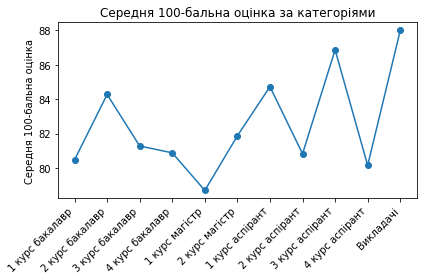

In [16]:


category_order = [
    ("бакалавр", 1),
    ("бакалавр", 2),
    ("бакалавр", 3),
    ("бакалавр", 4),
    ("магістр", 1),
    ("магістр", 2),
    ("аспірант", 1),
    ("аспірант", 2),
    ("аспірант", 3),
    ("аспірант", 4),
    ("викладач", 0)   # умовно позначимо 0 для викладачів
]

# Створимо в датафреймі колонку для ідентифікації цих груп
def get_category(row):
    if row["role"] == "викладач":
        return ("викладач", 0)
    else:
        # маємо ("бакалавр"/"магістр"/"аспірант") і деякий row["course"]
        return (row["education level"], row["course"]) if not pd.isna(row["course"]) else (row["education level"], 0)

df["plot_category"] = df.apply(get_category, axis=1)

# Обчислимо середню оцінку для кожної категорії
avg_scores_by_cat = df.groupby("plot_category")["100_score"].mean()

# Побудуємо список середніх значень у потрібному порядку
ordered_means = []
labels = []
for cat in category_order:
    if cat in avg_scores_by_cat.index:
        ordered_means.append(avg_scores_by_cat[cat])
    else:
        ordered_means.append(np.nan)
    labels.append(f"{cat[1]} курс {cat[0]}" if cat[0] != "викладач" else "Викладачі")

x = range(len(category_order))

plt.figure()
plt.plot(x, ordered_means, marker='o')  # лінійний графік
plt.xticks(x, labels, rotation=45, ha='right')
plt.title("Середня 100-бальна оцінка за категоріями")
plt.ylabel("Середня 100-бальна оцінка")
plt.tight_layout()
plt.show()



### Візуалізація 2.7

_**Діаграма "Пиріг" яка відображає кількість номерів телефонів за кожним з операторів ([Kyivstar, Lifecell, Vodafone](https://uk.wikipedia.org/wiki/Коди_мобільних_операторів_України)).**_

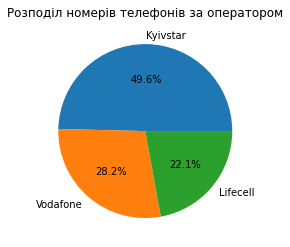

In [17]:


def get_operator(phone):
    match = re.match(r"^\+38\((\d{3})\)", str(phone))
    if not match:
        raise ValueError(f"wrong format {phone}")
    code = match.group(1)
    
    if code in ["067", "068", "096", "097", "098", "077", "039"]:
        return "Kyivstar"
    if code in ["050", "066", "095", "099", "075"]:
        return "Vodafone"
    if code in ["063", "073", "093"]:
        return "Lifecell"
    raise ValueError(f"Uknown operator{phone}")
    
df["operator"] = df["phone number"].apply(get_operator)

operator_counts = df["operator"].value_counts()

plt.figure()
operator_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Розподіл номерів телефонів за оператором")
plt.ylabel("")
plt.show()

